# I. 데이터 전처리

기상정보/전력 데이터를 import하고 이상치를 분석 및 처리 한 후 EDA를 수행하여 상관관계 분석

In [172]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as datetime
import matplotlib.pyplot as plt

In [173]:
# 주피터 노트북의 경고 메세지 무시
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [174]:
# 행렬이 잘려서 보이지 않는 상황 방지
pd.options.display.max_columns = 50
pd.options.display.max_rows = 50

### 1. 기상 데이터

#### 1-1. 데이터 불러오기

In [175]:
w = pd.read_csv("C:\\Users\\chmin\\OneDrive\\Desktop\\VSC\\-_BI_-\\DataSet\\서울특별시_서울_108_3월.csv", encoding ='cp949')
w

,지점,일시,기온(°C),누적강수량(mm),풍향(deg),풍속(m/s),현지기압(hPa),해면기압(hPa),습도(%),일사(MJ/m^2),일조(Sec)
0,108,2023-03-01 00:01,6.3,0.0,17.5,0.9,1013.6,1024.2,68.1,0.00,0
1,108,2023-03-01 00:02,6.3,0.0,28.0,0.8,1013.6,1024.2,69.0,0.00,0
2,108,2023-03-01 00:03,6.3,0.0,43.0,0.4,1013.6,1024.2,67.8,0.00,0
3,108,2023-03-01 00:04,6.3,0.0,37.0,0.7,1013.6,1024.2,68.2,0.00,0
4,108,2023-03-01 00:05,6.3,0.0,61.7,0.9,1013.5,1024.1,67.7,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...
44635,108,2023-03-31 23:56,12.4,0.0,278.4,0.8,1006.9,1017.2,46.9,22.99,40320
44636,108,2023-03-31 23:57,12.5,0.0,296.7,0.9,1006.9,1017.2,47.8,22.99,40320
44637,108,2023-03-31 23:58,12.5,0.0,297.2,1.2,1006.9,1017.2,47.9,22.99,40320
44638,108,2023-03-31 23:59,12.5,0.0,287.2,1.1,1006.9,1017.2,47.5,22.99,40320


#### 1-2. 결측치 확인 및 처리

(0.0, 1.0)

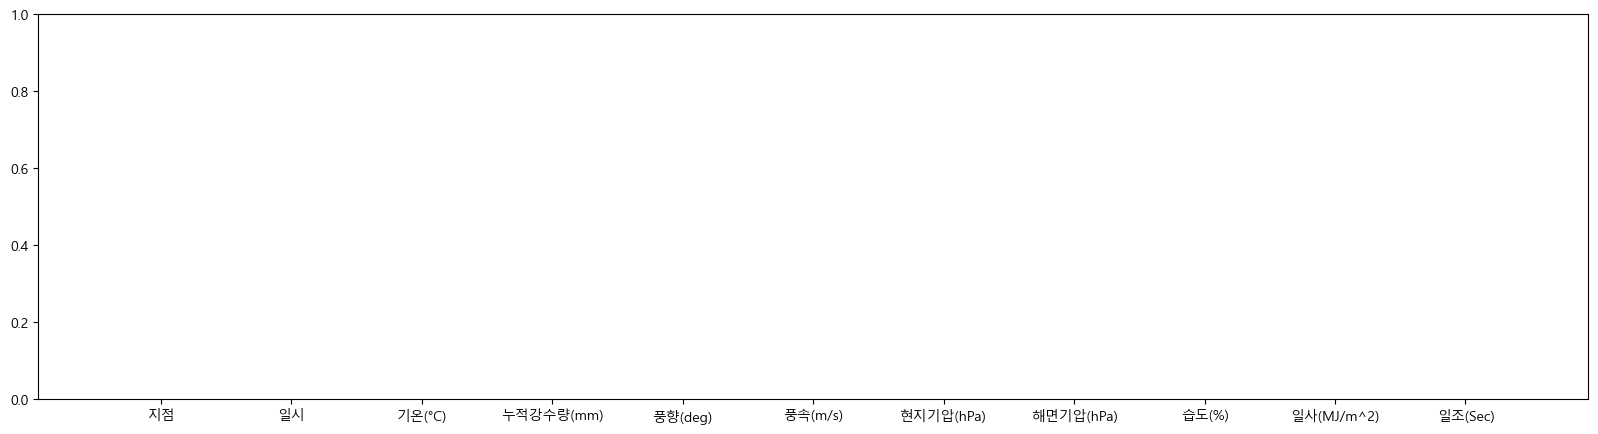

In [176]:
#각 column의 결측치 확인
isNull = w.isna().sum()/w.shape[0]
#한글폰트 오류 해결
plt.rc('font', family='Malgun Gothic')
#마이너스 값 출력 오류 해결
plt.rcParams['axes.unicode_minus'] = False
#막대그래프의 형태로 확인
plt.figure(figsize=(20, 5))
plt.bar(isNull.index, isNull.values, color='blue')
plt.ylim(0, 1)

#### 1-3. 데이터 특성 확인 및 변경

In [177]:
w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44640 entries, 0 to 44639
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   지점          44640 non-null  int64  
 1   일시          44640 non-null  object 
 2   기온(°C)      44640 non-null  float64
 3   누적강수량(mm)   44640 non-null  float64
 4   풍향(deg)     44640 non-null  float64
 5   풍속(m/s)     44640 non-null  float64
 6   현지기압(hPa)   44640 non-null  float64
 7   해면기압(hPa)   44640 non-null  float64
 8   습도(%)       44640 non-null  float64
 9   일사(MJ/m^2)  44640 non-null  float64
 10  일조(Sec)     44640 non-null  int64  
dtypes: float64(8), int64(2), object(1)
memory usage: 3.7+ MB


> 일시를 object에서 datetime으로 변경

In [178]:
w['일시'] = pd.to_datetime(w['일시'])

In [179]:
w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44640 entries, 0 to 44639
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   지점          44640 non-null  int64         
 1   일시          44640 non-null  datetime64[ns]
 2   기온(°C)      44640 non-null  float64       
 3   누적강수량(mm)   44640 non-null  float64       
 4   풍향(deg)     44640 non-null  float64       
 5   풍속(m/s)     44640 non-null  float64       
 6   현지기압(hPa)   44640 non-null  float64       
 7   해면기압(hPa)   44640 non-null  float64       
 8   습도(%)       44640 non-null  float64       
 9   일사(MJ/m^2)  44640 non-null  float64       
 10  일조(Sec)     44640 non-null  int64         
dtypes: datetime64[ns](1), float64(8), int64(2)
memory usage: 3.7 MB


> 필요한 데이터(3월 12일~3월19일)만 추출

In [180]:
w = w[w['일시'].between('2023-03-12 00:00', '2023-03-19 23:59')]
w.reset_index(inplace=True)

In [181]:
w = w.iloc[:, 1:]
w.head()

,지점,일시,기온(°C),누적강수량(mm),풍향(deg),풍속(m/s),현지기압(hPa),해면기압(hPa),습도(%),일사(MJ/m^2),일조(Sec)
0,108,2023-03-12 00:00:00,12.6,0.0,163.8,0.8,1010.6,1020.9,57.8,16.95,27180
1,108,2023-03-12 00:01:00,12.6,0.0,156.0,1.0,1010.6,1020.9,58.6,0.00,0
2,108,2023-03-12 00:02:00,12.6,0.0,157.1,1.5,1010.6,1020.9,58.5,0.00,0
3,108,2023-03-12 00:03:00,12.6,0.0,158.9,2.2,1010.5,1020.8,58.3,0.00,0
4,108,2023-03-12 00:04:00,12.5,0.0,159.1,2.2,1010.5,1020.8,58.6,0.00,0


In [201]:
w.tail()

,지점,일시,기온(°C),누적강수량(mm),풍향(deg),풍속(m/s),현지기압(hPa),해면기압(hPa),습도(%),일사(MJ/m^2),일조(Sec)
11515,108,2023-03-19 23:55:00,6.3,0.0,238.8,2.1,1007.8,1018.4,65.8,21.25,39900
11516,108,2023-03-19 23:56:00,6.3,0.0,185.2,1.0,1007.8,1018.4,64.9,21.25,39900
11517,108,2023-03-19 23:57:00,6.3,0.0,198.0,0.9,1007.8,1018.4,66.2,21.25,39900
11518,108,2023-03-19 23:58:00,6.3,0.0,207.6,1.3,1007.8,1018.4,65.0,21.25,39900
11519,108,2023-03-19 23:59:00,6.2,0.0,235.9,1.2,1007.8,1018.4,64.4,21.25,39900


### 2. 전력수급 데이터

#### 2-1. 데이터 불러오기

In [182]:
e = pd.read_csv('C:\\Users\\chmin\\OneDrive\\Desktop\\VSC\\-_BI_-\\DataSet\\한국전력거래소_5분단위 전력수급현황_20230430.csv', encoding='cp949')
e

,기준일시,공급능력(MW),현재수요(MW),최대예측수요(MW),공급예비력(MW),공급예비율(퍼센트),운영예비력(MW),운영예비율(퍼센트)
0,2022-04-01 00:00,82494.25,62453.29,70100,20040.96,32.08951,9257.45,14.82300
1,2022-04-01 00:05,83807.25,62329.25,70700,21477.99,34.45893,10889.28,17.47058
2,2022-04-01 00:10,83799.12,61830.96,70700,21968.15,35.52937,10865.86,17.57350
3,2022-04-01 00:15,83790.42,61648.72,70700,22141.69,35.91589,10864.26,17.62284
4,2022-04-01 00:20,83770.82,61382.62,70700,22388.19,36.47318,10451.95,17.02754
...,...,...,...,...,...,...,...,...
113638,2023-04-30 23:35,76101.03,53828.62,57300,22272.40,41.37651,9389.09,17.44257
113639,2023-04-30 23:40,76084.24,53693.20,57300,22391.04,41.70181,8897.85,16.57166
113640,2023-04-30 23:45,76083.32,52937.98,57300,23145.34,43.72161,9257.95,17.48829
113641,2023-04-30 23:50,76077.47,52679.85,57300,23397.62,44.41474,9303.84,17.66110


In [183]:
e.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113643 entries, 0 to 113642
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   기준일시        113643 non-null  object 
 1   공급능력(MW)    113643 non-null  float64
 2   현재수요(MW)    113643 non-null  float64
 3   최대예측수요(MW)  113643 non-null  int64  
 4   공급예비력(MW)   113643 non-null  float64
 5   공급예비율(퍼센트)  113643 non-null  float64
 6   운영예비력(MW)   113643 non-null  float64
 7   운영예비율(퍼센트)  113643 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 6.9+ MB


> 일시를 object에서 datetime으로 변경

In [184]:
e['기준일시'] = pd.to_datetime(e['기준일시'])

In [185]:
e.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113643 entries, 0 to 113642
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   기준일시        113643 non-null  datetime64[ns]
 1   공급능력(MW)    113643 non-null  float64       
 2   현재수요(MW)    113643 non-null  float64       
 3   최대예측수요(MW)  113643 non-null  int64         
 4   공급예비력(MW)   113643 non-null  float64       
 5   공급예비율(퍼센트)  113643 non-null  float64       
 6   운영예비력(MW)   113643 non-null  float64       
 7   운영예비율(퍼센트)  113643 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 6.9 MB


> 필요한 데이터(3월 12일~3월19일)만 추출

In [186]:
e = e[e['기준일시'].between('2023-03-12 00:00', '2023-03-19 23:55')]
#인덱스 0부터 재설정
e.reset_index(inplace=True)
e.head()

,index,기준일시,공급능력(MW),현재수요(MW),최대예측수요(MW),공급예비력(MW),공급예비율(퍼센트),운영예비력(MW),운영예비율(퍼센트)
0,99257,2023-03-12 00:00:00,80679.91,56865.18,62000,23814.72,41.87927,10011.64,17.60592
1,99258,2023-03-12 00:05:00,80025.00,56445.77,62000,23579.22,41.77324,10347.60,18.33194
2,99259,2023-03-12 00:10:00,79985.50,55774.66,62000,24210.84,43.40832,10993.81,19.71113
3,99260,2023-03-12 00:15:00,79962.31,55562.51,61500,24399.79,43.91412,11246.96,20.24200
4,99261,2023-03-12 00:20:00,79937.03,55284.42,61500,24652.60,44.59231,10889.49,19.69722


In [187]:
e = e.iloc[:, 1:]

In [188]:
e.head()

,기준일시,공급능력(MW),현재수요(MW),최대예측수요(MW),공급예비력(MW),공급예비율(퍼센트),운영예비력(MW),운영예비율(퍼센트)
0,2023-03-12 00:00:00,80679.91,56865.18,62000,23814.72,41.87927,10011.64,17.60592
1,2023-03-12 00:05:00,80025.00,56445.77,62000,23579.22,41.77324,10347.60,18.33194
2,2023-03-12 00:10:00,79985.50,55774.66,62000,24210.84,43.40832,10993.81,19.71113
3,2023-03-12 00:15:00,79962.31,55562.51,61500,24399.79,43.91412,11246.96,20.24200
4,2023-03-12 00:20:00,79937.03,55284.42,61500,24652.60,44.59231,10889.49,19.69722


# II. EDA (Exploratory Data Analysis)

### 1. 시각화

In [189]:
w.head()

,지점,일시,기온(°C),누적강수량(mm),풍향(deg),풍속(m/s),현지기압(hPa),해면기압(hPa),습도(%),일사(MJ/m^2),일조(Sec)
0,108,2023-03-12 00:00:00,12.6,0.0,163.8,0.8,1010.6,1020.9,57.8,16.95,27180
1,108,2023-03-12 00:01:00,12.6,0.0,156.0,1.0,1010.6,1020.9,58.6,0.00,0
2,108,2023-03-12 00:02:00,12.6,0.0,157.1,1.5,1010.6,1020.9,58.5,0.00,0
3,108,2023-03-12 00:03:00,12.6,0.0,158.9,2.2,1010.5,1020.8,58.3,0.00,0
4,108,2023-03-12 00:04:00,12.5,0.0,159.1,2.2,1010.5,1020.8,58.6,0.00,0


In [202]:
e.head()

,기준일시,공급능력(MW),현재수요(MW),최대예측수요(MW),공급예비력(MW),공급예비율(퍼센트),운영예비력(MW),운영예비율(퍼센트)
0,2023-03-12 00:00:00,80679.91,56865.18,62000,23814.72,41.87927,10011.64,17.60592
1,2023-03-12 00:05:00,80025.00,56445.77,62000,23579.22,41.77324,10347.60,18.33194
2,2023-03-12 00:10:00,79985.50,55774.66,62000,24210.84,43.40832,10993.81,19.71113
3,2023-03-12 00:15:00,79962.31,55562.51,61500,24399.79,43.91412,11246.96,20.24200
4,2023-03-12 00:20:00,79937.03,55284.42,61500,24652.60,44.59231,10889.49,19.69722


In [242]:
lines = list(e[e['기준일시'].dt.hour == 00].index)

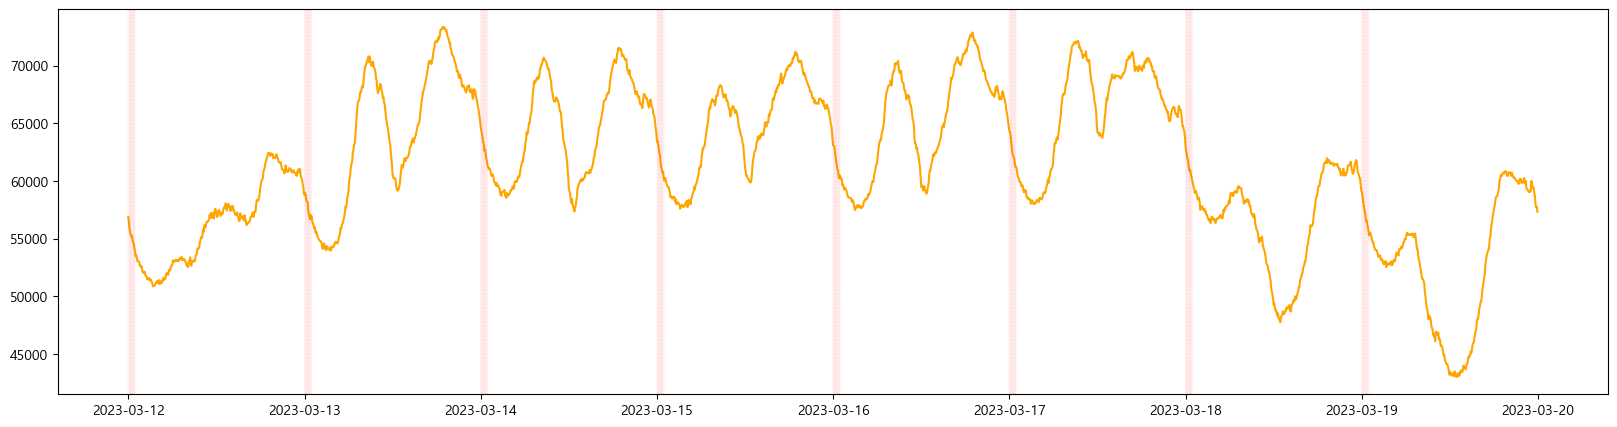

In [254]:
plt.figure(figsize=(20,5))

plt.plot(e['기준일시'], e['현재수요(MW)'], color='orange')

#일별로 구분선 제시
for line in lines:
    plt.axvline(e['기준일시'].iloc[line], color='red', linestyle=':', linewidth=0.1)

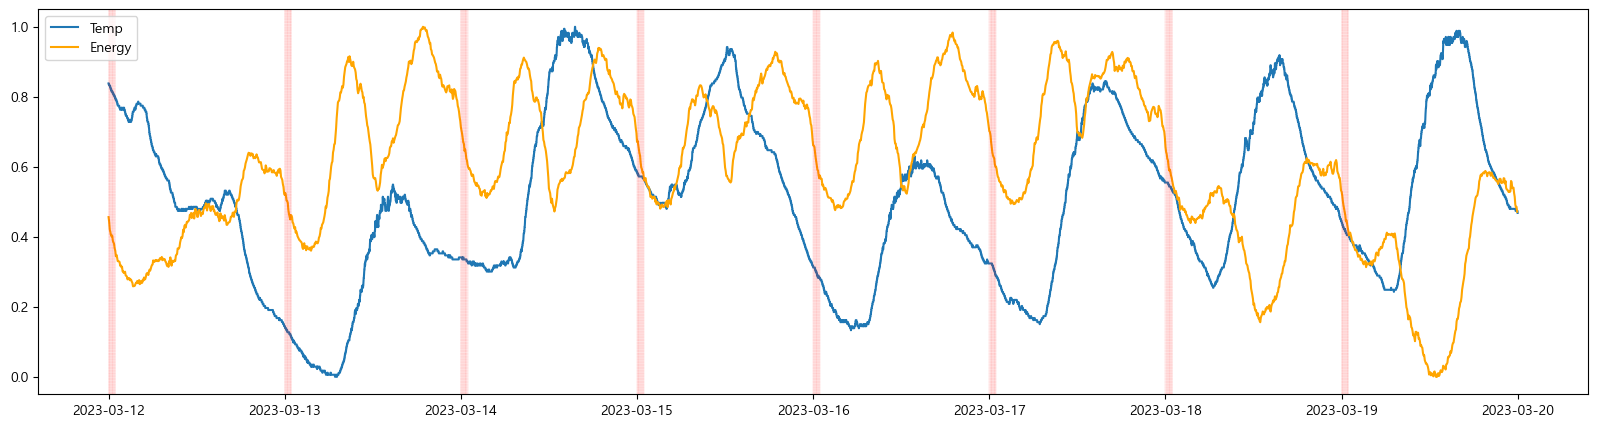

In [262]:
plt.figure(figsize=(20,5))

#두 데이터 비교를 위한 정규화
we = (w['기온(°C)'] - w['기온(°C)'].min()) / (w['기온(°C)'].max() - w['기온(°C)'].min())

en = (e['현재수요(MW)'] - e['현재수요(MW)'].min()) / (e['현재수요(MW)'].max() - e['현재수요(MW)'].min())

plt.plot(w['일시'], we)
plt.plot(e['기준일시'], en, color='orange')
plt.legend(['Temp', 'Energy'], loc='upper left')

for line in lines:
    plt.axvline(e['기준일시'].iloc[line], color='red', linestyle='--', linewidth=0.1)

> 상관관계분석을 위해 기상정보의 시간간격을 5분단위로 변경

In [297]:
w1 = w[w['일시'].dt.minute%5==0]

In [298]:
w1.reset_index(inplace=True)
w1 = w1.iloc[:, 2:]

In [301]:
w1.rename(columns={'일시':'기준일시'}, inplace=True)

In [302]:
w1.head()

,기준일시,기온(°C),누적강수량(mm),풍향(deg),풍속(m/s),현지기압(hPa),해면기압(hPa),습도(%),일사(MJ/m^2),일조(Sec)
0,2023-03-12 00:00:00,12.6,0.0,163.8,0.8,1010.6,1020.9,57.8,16.95,27180
1,2023-03-12 00:05:00,12.5,0.0,159.9,1.9,1010.5,1020.8,58.4,0.00,0
2,2023-03-12 00:10:00,12.5,0.0,88.6,0.9,1010.5,1020.8,58.5,0.00,0
3,2023-03-12 00:15:00,12.4,0.0,96.3,2.0,1010.4,1020.7,58.6,0.00,0
4,2023-03-12 00:20:00,12.3,0.0,105.4,1.5,1010.4,1020.7,58.5,0.00,0


> 기상정보와 전력정보 데이터프레임 합치기

In [312]:
cor = pd.merge(w1, e)

In [314]:
cor.head()

,기준일시,기온(°C),누적강수량(mm),풍향(deg),풍속(m/s),현지기압(hPa),해면기압(hPa),습도(%),일사(MJ/m^2),일조(Sec),공급능력(MW),현재수요(MW),최대예측수요(MW),공급예비력(MW),공급예비율(퍼센트),운영예비력(MW),운영예비율(퍼센트)
0,2023-03-12 00:00:00,12.6,0.0,163.8,0.8,1010.6,1020.9,57.8,16.95,27180,80679.91,56865.18,62000,23814.72,41.87927,10011.64,17.60592
1,2023-03-12 00:05:00,12.5,0.0,159.9,1.9,1010.5,1020.8,58.4,0.00,0,80025.00,56445.77,62000,23579.22,41.77324,10347.60,18.33194
2,2023-03-12 00:10:00,12.5,0.0,88.6,0.9,1010.5,1020.8,58.5,0.00,0,79985.50,55774.66,62000,24210.84,43.40832,10993.81,19.71113
3,2023-03-12 00:15:00,12.4,0.0,96.3,2.0,1010.4,1020.7,58.6,0.00,0,79962.31,55562.51,61500,24399.79,43.91412,11246.96,20.24200
4,2023-03-12 00:20:00,12.3,0.0,105.4,1.5,1010.4,1020.7,58.5,0.00,0,79937.03,55284.42,61500,24652.60,44.59231,10889.49,19.69722


C:\Users\chmin\AppData\Local\Temp\ipykernel_145304\874706011.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(correlation_Matrix, dtype=np.bool)


Text(0.5, 1.0, '상관관계분석')

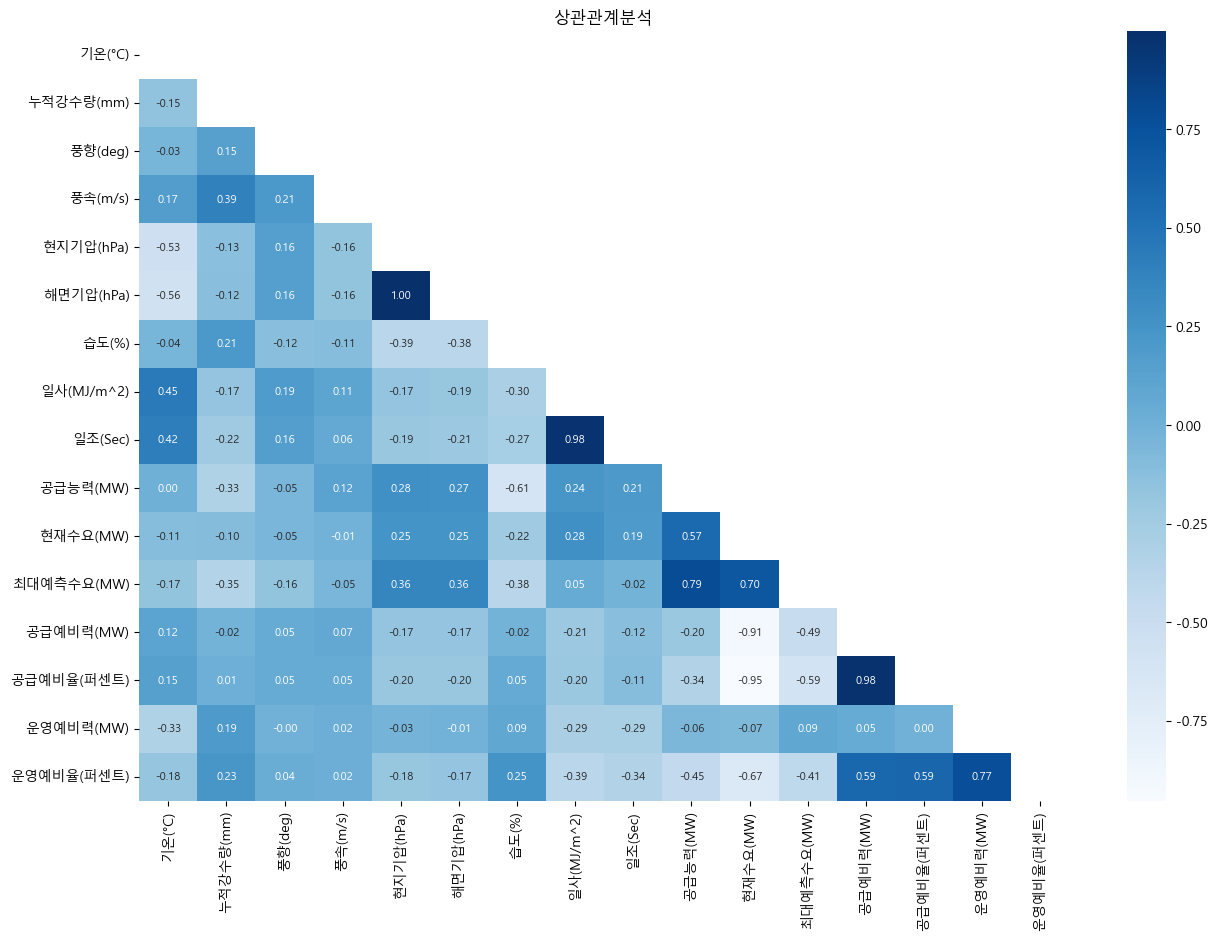

In [327]:
correlation_Matrix = cor.iloc[:,1:].corr()

mask = np.zeros_like(correlation_Matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(15,10))
sns.heatmap(correlation_Matrix, cmap='Blues', annot=True, fmt='.2f', annot_kws={'size': 8}, mask=mask)
plt.title('상관관계분석')